### I have applied simple Logistc Regression to predict the outcome.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#df_test.head(2)
df_train.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [4]:
df_train.shape

(10000, 10)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
age                           10000 non-null int64
cost_of_ad                    10000 non-null float64
device_type                   10000 non-null object
gender                        9731 non-null object
in_initial_launch_location    10000 non-null int64
income                        10000 non-null int64
n_drivers                     10000 non-null int64
n_vehicles                    10000 non-null int64
prior_ins_tenure              10000 non-null int64
outcome                       10000 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 781.3+ KB


In [6]:
df_train.isna().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

In [7]:
df_train.dropna(subset=['gender'], inplace=True)

In [8]:
df_train.isna().sum()

age                           0
cost_of_ad                    0
device_type                   0
gender                        0
in_initial_launch_location    0
income                        0
n_drivers                     0
n_vehicles                    0
prior_ins_tenure              0
outcome                       0
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9731 entries, 0 to 9998
Data columns (total 10 columns):
age                           9731 non-null int64
cost_of_ad                    9731 non-null float64
device_type                   9731 non-null object
gender                        9731 non-null object
in_initial_launch_location    9731 non-null int64
income                        9731 non-null int64
n_drivers                     9731 non-null int64
n_vehicles                    9731 non-null int64
prior_ins_tenure              9731 non-null int64
outcome                       9731 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 836.3+ KB


In [10]:
df_train.describe()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
count,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000,9731.000000
mean,37.978933,0.004678,0.498202,58015.171000,1.496557,1.998150,5.401706,0.099990
std,13.036855,0.000838,0.500022,17299.989819,0.500014,0.817333,5.042682,0.300002
min,16.000000,0.003171,0.000000,16241.000000,1.000000,1.000000,0.000000,0.000000
25%,27.000000,0.004010,0.000000,45564.500000,1.000000,1.000000,1.000000,0.000000
50%,38.000000,0.004640,0.000000,58094.000000,1.000000,2.000000,4.000000,0.000000
75%,49.000000,0.005168,1.000000,70224.000000,2.000000,3.000000,8.000000,0.000000
max,60.000000,0.007082,1.000000,99956.000000,2.000000,3.000000,22.000000,1.000000


In [19]:
# Converting Gender values to numerical.
df_train['gender'] = df_train['gender'].astype('category').cat.codes
# Converting device_type values to numerical.
df_train['device_type'] = df_train['device_type'].astype('category').cat.codes
df_train.head(3)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,2,1,0,62717,2,1,4,0
1,50,0.004733,1,0,0,64328,2,3,2,0
2,54,0.004129,3,1,0,83439,1,3,7,0


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9731 entries, 0 to 9998
Data columns (total 10 columns):
age                           9731 non-null int64
cost_of_ad                    9731 non-null float64
device_type                   9731 non-null int8
gender                        9731 non-null int8
in_initial_launch_location    9731 non-null int64
income                        9731 non-null int64
n_drivers                     9731 non-null int64
n_vehicles                    9731 non-null int64
prior_ins_tenure              9731 non-null int64
outcome                       9731 non-null int64
dtypes: float64(1), int64(7), int8(2)
memory usage: 703.2 KB


## Logistic regression model

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.decomposition import PCA
import numpy as np;
import matplotlib.pyplot as plt

# Spliting outcome column
X = df_train.loc[:, df_train.columns != 'outcome']
Y = df_train['outcome']

#Applying Scaler
scaler = StandardScaler().fit(X)
x_scaled = scaler.transform(X)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(x_scaled,Y, random_state=66, test_size=0.20)

/Users/silence/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/silence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.


In [65]:
# LogisticRegression Model
my_model = LogisticRegression().fit(X_train, y_train)

# Checking training score
train_score = my_model.score(x_scaled, Y)
#train_score = my_model.score(X_train, Y)
print('Training accuracy is ', train_score * 100)

Training accuracy is  90.7101017367177


/Users/silence/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
test_score = my_model.score(X_test, y_test)
test_score

0.9198767334360555

#What are the coefficients. Make a plot that shows the importance of each feature in your model

coefficient and bias are:

 [[-0.05121362  0.10941236 -0.67089244  0.61427152  0.47374192  0.10218965
   0.40671077 -0.78636926 -0.11224228]] and [-2.77719145]


<BarContainer object of 9 artists>

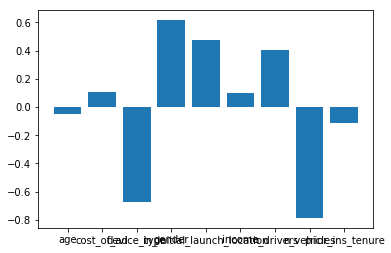

In [67]:
print('coefficient and bias are:\n\n',my_model.coef_,'and', my_model.intercept_) 
# bar plot to show the importance
plt.bar(X.columns, my_model.coef_[0])

In [68]:
# prediction and checking precision,recall,f1-score value
pred_x_train = my_model.predict(x_scaled) 
print(classification_report(Y,pred_x_train))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8758
           1       0.81      0.09      0.17       973

   micro avg       0.91      0.91      0.91      9731
   macro avg       0.86      0.55      0.56      9731
weighted avg       0.90      0.91      0.87      9731



In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix(Y, pred_x_train)

array([[8736,   22],
       [ 882,   91]])

In [70]:
# Checking for AUC of traning dataset
prob_train = my_model.predict_proba(x_scaled)
fpr, tpr, thresholds = metrics.roc_curve(Y, prob_train[:,1])
metrics.auc(fpr, tpr)

0.8055079050321221

## Analysing Test Data

In [71]:
df_test.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,0,0,1,40376,1,3,7
1,53,0.005223,1,0,1,84511,1,1,11
2,46,0.004939,3,0,0,79322,1,1,4
3,36,0.004924,0,0,0,63295,1,2,0
4,28,0.005146,4,0,1,36170,1,3,3


In [72]:
df_test.describe()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
count,9751.000000,9751.000000,9751.000000,9751.000000,9751.000000,9751.000000,9751.000000,9751.000000,9751.000000
mean,38.040919,0.004681,2.015896,0.496872,0.502513,58234.384473,1.486719,2.008512,5.322736
std,12.908247,0.000834,1.420817,0.500016,0.500019,17327.908847,0.499849,0.817896,5.028181
min,16.000000,0.003173,0.000000,0.000000,0.000000,16124.000000,1.000000,1.000000,0.000000
25%,27.000000,0.004016,1.000000,0.000000,0.000000,45567.500000,1.000000,1.000000,1.000000
50%,38.000000,0.004625,2.000000,0.000000,1.000000,58290.000000,1.000000,2.000000,4.000000
75%,49.000000,0.005180,3.000000,1.000000,1.000000,70472.500000,2.000000,3.000000,8.000000
max,60.000000,0.007049,4.000000,1.000000,1.000000,99916.000000,2.000000,3.000000,22.000000


In [73]:
df_test.isna().sum()

age                           0
cost_of_ad                    0
device_type                   0
gender                        0
in_initial_launch_location    0
income                        0
n_drivers                     0
n_vehicles                    0
prior_ins_tenure              0
dtype: int64

In [74]:
df_test.dropna(subset=['gender'], inplace=True)

In [75]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9751 entries, 0 to 9999
Data columns (total 9 columns):
age                           9751 non-null int64
cost_of_ad                    9751 non-null float64
device_type                   9751 non-null int8
gender                        9751 non-null int8
in_initial_launch_location    9751 non-null int64
income                        9751 non-null int64
n_drivers                     9751 non-null int64
n_vehicles                    9751 non-null int64
prior_ins_tenure              9751 non-null int64
dtypes: float64(1), int64(6), int8(2)
memory usage: 628.5 KB


In [76]:
# Converting Gender values to numerical.
df_test['gender'] = df_test['gender'].astype('category').cat.codes
# Converting device_type values to numerical.
df_test['device_type'] = df_test['device_type'].astype('category').cat.codes
df_test.head(3)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,0,0,1,40376,1,3,7
1,53,0.005223,1,0,1,84511,1,1,11
2,46,0.004939,3,0,0,79322,1,1,4


In [82]:
x_scaled_test = scaler.transform(df_test)
prediction1 = my_model.predict(x_scaled_test)

/Users/silence/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [83]:
# On Scaled data
print("Outcome of 1 count is:",prediction1.sum())

Outcome of 1 count is: 130


In [84]:
test_score = my_model.score(x_scaled_test, prediction1)
print('Testing accuracy is ', test_score *100)

Testing accuracy is  100.0


In [85]:
#Plotting the ROC curve for test dataset
prob_test = my_model.predict_proba(x_scaled_test)
#prob_test
#prediction1

Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False positve rate')

Text(0, 0.5, 'True positve rate')

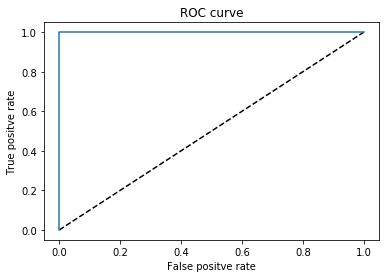

In [86]:
fpr, tpr, thresholds = metrics.roc_curve(prediction1, prob_test[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positve rate')
plt.ylabel('True positve rate')

In [87]:
metrics.auc(fpr, tpr)

1.0

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth= 50)
rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
rfc_pred = rfc.predict(X)
rfc_prod = rfc.predict_proba(X)
print(classification_report(Y,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8758
           1       1.00      1.00      1.00       973

   micro avg       1.00      1.00      1.00      9731
   macro avg       1.00      1.00      1.00      9731
weighted avg       1.00      1.00      1.00      9731



In [90]:
fpr1, tpr1, thresholds = metrics.roc_curve(rfc_pred, rfc_prod[:,1])
metrics.auc(fpr1, tpr1)

1.0

In [91]:
# On Scaled data
#print("Outcome of 1 count is:",rfc_pred.sum())

Outcome of 1 count is: 973
